# CLASSIFICATION OF LAB SAMPLES

This notebook analyzes the AM_MDM and AW_plus_v_AW_neg samples.

# Preliminaries

In [1]:
import init
from common import constants as cn
from common.trinary_data import TrinaryData
from common import trinary_data
from common_python.plots import util_plots
from common_python.classifier import classifier_ensemble
from common_python.classifier import classifier_collection
from common import transform_data

import collections
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import cross_val_score

%matplotlib inline

# Data
Data used in the analysis.

In [2]:
DATA = TrinaryData(is_regulator=False, is_dropT1=True, is_averaged=True)
DATA.df_X.head()

,Rv1927,Rv1129c,Rv3085,Rv3083,Rv3086,Rv2226,Rv0260c,Rv1365c,Rv3084,Rv0975c,...,Rv3267,Rv2748c,Rv3260c,Rv0350,Rv2737c,Rv0440--Rv3417c,Rv2734,Rv0519c,Rv3418c,Rv3269
T2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# Not averaged
DATA = TrinaryData(is_regulator=False, is_averaged=True, is_dropT1=True)
DATA.df_X.head()

,Rv1927,Rv1129c,Rv3085,Rv3083,Rv3086,Rv2226,Rv0260c,Rv1365c,Rv3084,Rv0975c,...,Rv3267,Rv2748c,Rv3260c,Rv0350,Rv2737c,Rv0440--Rv3417c,Rv2734,Rv0519c,Rv3418c,Rv3269
T2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
DATA.ser_y.head()

timepoint
T2    1
T3    1
T4    1
T5    1
T6    1
Name: name, dtype: int64

# Lab Samples

In [5]:
def sortColumns(df):
    columns = list(df.columns)
    columns.sort()
    df.columns = columns
    df = df.sort_index()
    return df

In [6]:
def getSampleData(**kwargs):
    sample_data = trinary_data.getSampleData(**kwargs)
    dct = {}
    for sample in trinary_data.SAMPLES:
        dct[sample] = sortColumns(sample_data.__getattribute__(sample))
    return dct
        
SAMPLE_CURATED_REF_DCT = getSampleData(is_regulator=False, is_curated_ref=True)
SAMPLE_UNCURATED_REF_DCT = getSampleData(is_regulator=False, is_curated_ref=False)

(array([  70.,    0.,    0.,    0.,    0.,  175.,    0.,    0.,    0.,
           0., 4724.,    0.,    0.,    0.,    0., 4101.,    0.,    0.,
           0., 1258.]),
 array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
         0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 20 Patch objects>)

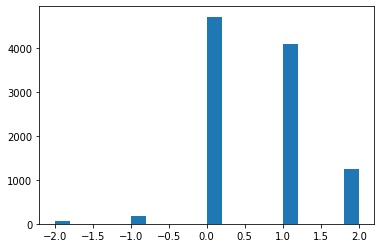

In [7]:
df = SAMPLE_CURATED_REF_DCT["AM_MDM"] - SAMPLE_UNCURATED_REF_DCT["AM_MDM"]
df = df.T.dropna(axis=1, how='all').T
plt.hist(df.values.flatten(), bins=20)

# Classification Validations on Training Samples
Classify T2-T25 and see if result is same as original class. Use 5-fold cross validation, where there is a holdout for each class and the selection is random.


In [ ]:
accuracy_dct = {}
for rank in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    accuracy_dct[rank] = classifier_ensemble.ClassifierEnsemble.crossValidate(
        DATA, num_iter=10, num_holdout=1, filter_high_rank=rank, size=20)
plt.plot(list(accuracy_dct.keys()), list(accuracy_dct.values()))
plt.ylim([0, 1.1])
_ = plt.xlabel("No genes in clasifier")
_ = plt.ylabel("accuracy")

# Classification of Other Samples

In [ ]:
svm_ensemble = classifier_ensemble.ClassifierEnsemble(
        classifier_ensemble.ClassifierDescriptorSVM(), filter_high_rank=32, size=50)
svm_ensemble.fit(DATA.df_X, DATA.ser_y)

In [ ]:
svm_ensemble.predict(SAMPLE_CURATED_REF_DCT["AM_MDM"])

In [ ]:
svm_ensemble.predict(SAMPLE_UNCURATED_REF_DCT.AM_MDM)